In [1]:
import jax.numpy as jnp
import jax
from modules.polyfit import Polyfit

target_values = jnp.load('obj_args/target_values.npy')
target_error = jnp.load('obj_args/target_error.npy')
coeffs = jnp.load('obj_args/coeffs.npy')
coeff_cov = jnp.load('obj_args/coeff_cov.npy')
target_binidns = jnp.load('obj_args/targ_bins.npy')

p_opt = jnp.array(jnp.load('obj_args/p_opt.npy'))


fits = Polyfit('summer_data/fits.npz', order=3, covariance = True, cpu = True, reg_mode = "lasso_w", reg_param = 0.01)

def objective_func(params, d, d_sig, coeff, cov):
    sum_over = 0
    poly = fits.vandermonde_jax(jnp.array([params]), fits.order)[0]
    norm = jnp.sum(fits.obs_weights)
    #Loop over the bins
    for i in target_binidns:
        f_sig = jnp.sqrt(jnp.matmul(poly, jnp.matmul(cov[i], poly.T))) #Finding uncertainty of surrogate function at point p
        adj_res_sq = fits.obs_weights[i]*(d[i]-jnp.matmul(coeff[i], poly.T))**2/(d_sig[i]**2 + f_sig**2) #Inner part of summation
        sum_over = sum_over + adj_res_sq
    return sum_over/norm

def obj_mini(param):
    return objective_func(param, target_values, target_error, coeffs, coeff_cov)

def Hessian(func):
    return jax.jacfwd(jax.jacrev(func))

hess = Hessian(obj_mini)(p_opt)
print("Objective function min: ", objective_func(p_opt, target_values, target_error, coeffs, coeff_cov))
print("Hessian at p_opt: ", hess)
print("jacfwd: ", jax.jacrev(obj_mini)(p_opt))







loading  summer_data/fits.npz
Objective function min:  0.6424796754084697
Hessian at p_opt:  [[870.07516019]]
jacfwd:  [-24.83300516]


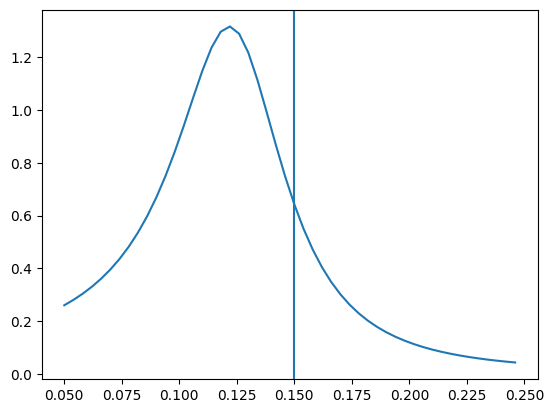

In [2]:
import matplotlib.pyplot as plt
import numpy as np

graph_spread = 0.1
density = 50
n = 450
x = jnp.arange(p_opt[0]-graph_spread, p_opt[0]+graph_spread, 2*graph_spread/density)
y = jnp.array([obj_mini(jnp.array([p])) for p in x])
hess = jnp.array([jnp.array([1000231029747])])
plt.plot(x, y)
plt.axvline(p_opt[0])
if jnp.isnan(hess)[0][0]:
    fil_nam = 'ZFAIL/'+str(n)+'.png'
    plt.savefig(fil_nam)
else:
    fil_nam = 'ZWORK/'+str(n)+'.png'
    plt.savefig(fil_nam)


In [10]:
p_opt


DeviceArray([0.15], dtype=float64)

In [19]:
def cubic(x):
    return jnp.sum(fits.vandermonde_jax([x], 3))

a = jnp.array([2.0])

print(cubic(a))
print(Hessian(cubic)(a))
print(jax.jacfwd(cubic)(a))
print(jax.jacrev(cubic)(a))

15.0
[[14.]]
[17.]
[17.]


In [14]:
jnp.array([a])

DeviceArray([[2.]], dtype=float64)

In [26]:
a = '/ATLAS_2019_I1736531/d'
e = '-x01-y01'

for i in jnp.arange(0, 150, 1):
    print(a+str(i)+e)

'0'+str(1)

/ATLAS_2019_I1736531/d0-x01-y01
/ATLAS_2019_I1736531/d1-x01-y01
/ATLAS_2019_I1736531/d2-x01-y01
/ATLAS_2019_I1736531/d3-x01-y01
/ATLAS_2019_I1736531/d4-x01-y01
/ATLAS_2019_I1736531/d5-x01-y01
/ATLAS_2019_I1736531/d6-x01-y01
/ATLAS_2019_I1736531/d7-x01-y01
/ATLAS_2019_I1736531/d8-x01-y01
/ATLAS_2019_I1736531/d9-x01-y01
/ATLAS_2019_I1736531/d10-x01-y01
/ATLAS_2019_I1736531/d11-x01-y01
/ATLAS_2019_I1736531/d12-x01-y01
/ATLAS_2019_I1736531/d13-x01-y01
/ATLAS_2019_I1736531/d14-x01-y01
/ATLAS_2019_I1736531/d15-x01-y01
/ATLAS_2019_I1736531/d16-x01-y01
/ATLAS_2019_I1736531/d17-x01-y01
/ATLAS_2019_I1736531/d18-x01-y01
/ATLAS_2019_I1736531/d19-x01-y01
/ATLAS_2019_I1736531/d20-x01-y01
/ATLAS_2019_I1736531/d21-x01-y01
/ATLAS_2019_I1736531/d22-x01-y01
/ATLAS_2019_I1736531/d23-x01-y01
/ATLAS_2019_I1736531/d24-x01-y01
/ATLAS_2019_I1736531/d25-x01-y01
/ATLAS_2019_I1736531/d26-x01-y01
/ATLAS_2019_I1736531/d27-x01-y01
/ATLAS_2019_I1736531/d28-x01-y01
/ATLAS_2019_I1736531/d29-x01-y01
/ATLAS_2019_I1736531

'01'